<a href="https://colab.research.google.com/github/ngingumuntu/freecodecamp-projects/blob/main/sea_level_predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sea Level Predictor
You will analyze a dataset of the global average sea level change since 1880. You will use the data to predict the sea level change through year 2050.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

### Reading the data

In [2]:
df = pd.read_csv(
    'epa-sea-level.csv',
    header = 0,
    index_col = 'Year'
)

In [3]:
df.head()

,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
Year,,,,
1880,0.000000,-0.952756,0.952756,NaN
1881,0.220472,-0.732283,1.173228,NaN
1882,-0.440945,-1.346457,0.464567,NaN
1883,-0.232283,-1.129921,0.665354,NaN
1884,0.590551,-0.283465,1.464567,NaN


In [4]:
df.describe()

,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
count,134.000000,134.000000,134.000000,21.000000
mean,3.650341,3.204666,4.096016,7.363746
std,2.485692,2.663781,2.312581,0.691038
min,-0.440945,-1.346457,0.464567,6.297493
25%,1.632874,1.078740,2.240157,6.848690
50%,3.312992,2.915354,3.710630,7.488353
75%,5.587598,5.329724,5.845472,7.907365
max,9.326772,8.992126,9.661417,8.546648


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 134 entries, 1880 to 2013
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CSIRO Adjusted Sea Level  134 non-null    float64
 1   Lower Error Bound         134 non-null    float64
 2   Upper Error Bound         134 non-null    float64
 3   NOAA Adjusted Sea Level   21 non-null     float64
dtypes: float64(4)
memory usage: 5.2 KB


### Create plot

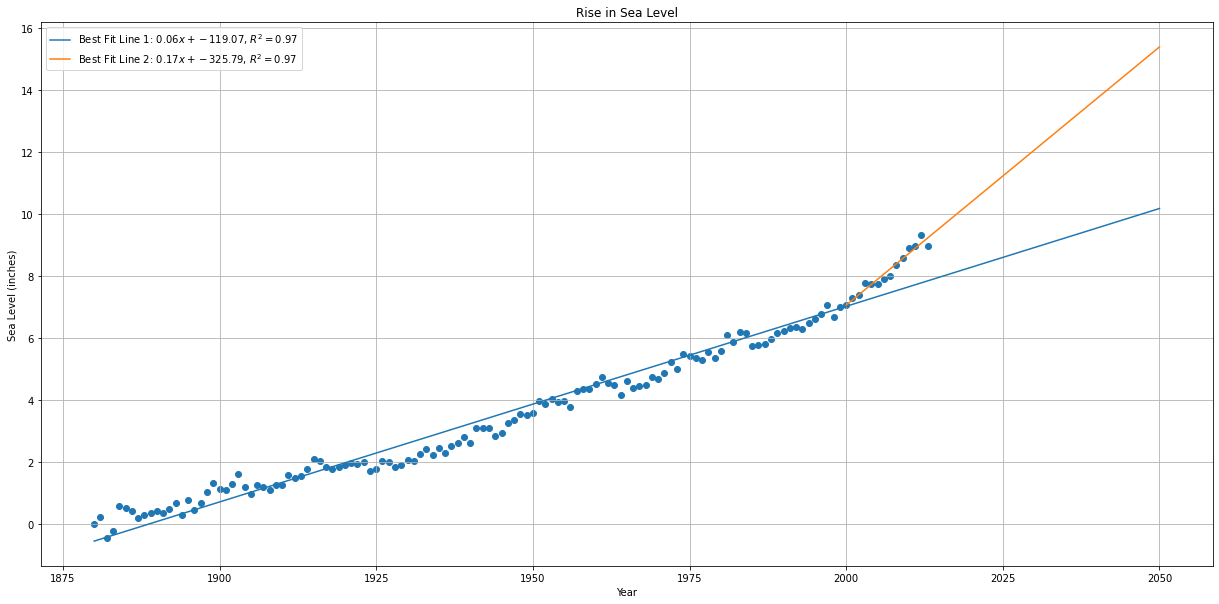

In [8]:
# Create scatter plot
x = df.index
y = df['CSIRO Adjusted Sea Level']
  
plt.figure(1, figsize = (21, 10))
ax = plt.subplot()
ax.scatter(x, y)

# Create first line of best fit
slope, intercept, r_value, p_value, std_err = linregress(x, y)
line_x1 = np.arange(x.min(), 2051)
line_y1 = slope * line_x1 + intercept

plt.plot(line_x1, line_y1, label = 'Best Fit Line 1: $%.2fx + %.2f$, $R^2=%.2f$' % (slope, intercept, r_value ** 2))

# Create second line of best fit
xx = df[ df.index >= 2000 ].index
yy = df[ df.index >= 2000 ]['CSIRO Adjusted Sea Level']

fit2 = linregress(xx, yy)
slope2 = fit2.slope
intercept2 = fit2.intercept
    
line_x2 = np.arange(xx.min(), 2051)
line_y2 = slope2 * line_x2 + intercept2  
    
plt.plot(line_x2, line_y2, label = 'Best Fit Line 2: $%.2fx + %.2f$, $R^2=%.2f$' % (slope2, intercept2, r_value ** 2))

# Add labels and title
plt.legend(loc = 'best')
plt.title('Rise in Sea Level')
plt.xlabel('Year')
plt.ylabel('Sea Level (inches)')
plt.grid()
    
# Save plot
plt.savefig('sea_level_plot.png')